In [1]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bar = pd.read_csv("weather_barcelona.csv", index_col="Date")
rom = pd.read_csv("weather_rome.csv", index_col="Date")
ams = pd.read_csv("weather_amsterdam.csv", index_col="Date")
bar.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin
Date,,,,,
2018-01-01,17,11,0,13,7
2018-01-02,19,8,0,13,7
2018-01-03,23,11,0,13,7
2018-01-04,24,15,0,13,7
2018-01-05,20,10,0,13,7


<AxesSubplot:xlabel='Date'>

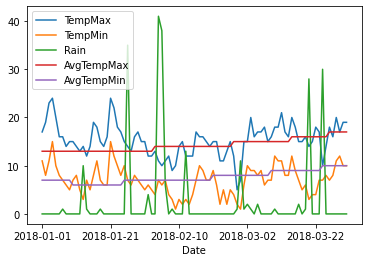

In [4]:
bar.plot()

<AxesSubplot:xlabel='Date'>

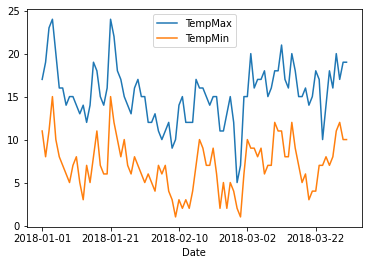

In [8]:
bar[["TempMax","TempMin"]].plot()

<AxesSubplot:xlabel='Date'>

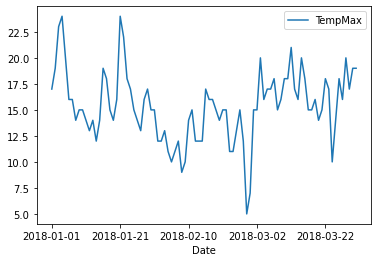

In [6]:
bar.plot(y="TempMax")

In [13]:
#okreslamy temperatury maxymalne dla miast
temp_max = pd.DataFrame(index=bar.index)

In [18]:
temp_max['Barcelona'] = bar["TempMax"]
temp_max['Rome'] = rom["TempMax"]
temp_max['Amsterdam'] = ams["TempMax"]
#maksymalne temperatury w poszczególne dni
temp_max.head()

,Barcelona,Rome,Amsterdam
Date,,,
2018-01-01,17,14,8
2018-01-02,19,13,9
2018-01-03,23,14,11
2018-01-04,24,16,11
2018-01-05,20,17,8


<AxesSubplot:xlabel='Date'>

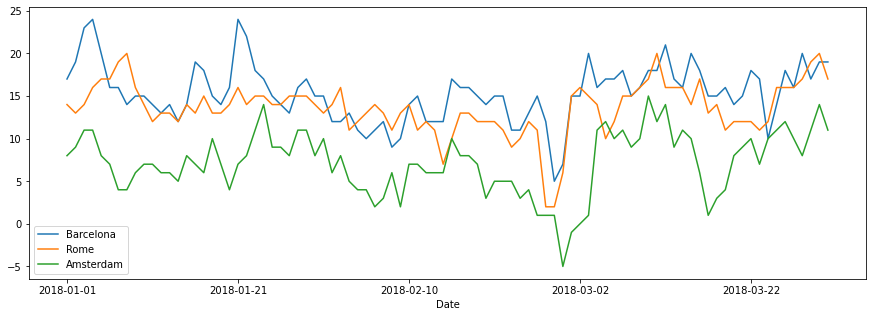

In [21]:
#figsize- wielkość wykresu, 
temp_max.plot(figsize=(15,5))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

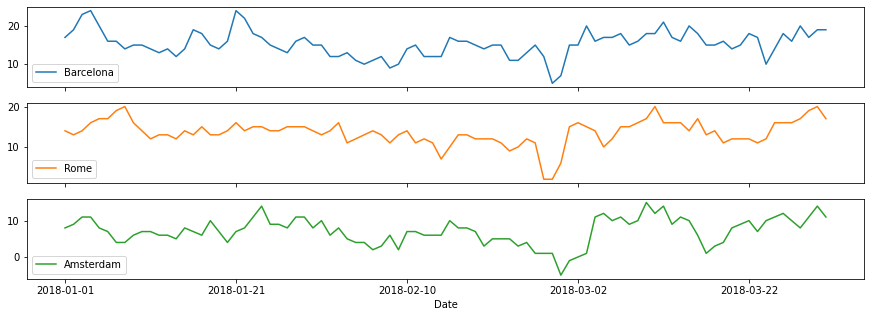

In [22]:
#trzy osobne wykresy
temp_max.plot(figsize=(15,5) , subplots=True)

<AxesSubplot:title={'center':'Max temperature by city/date'}, xlabel='Date'>

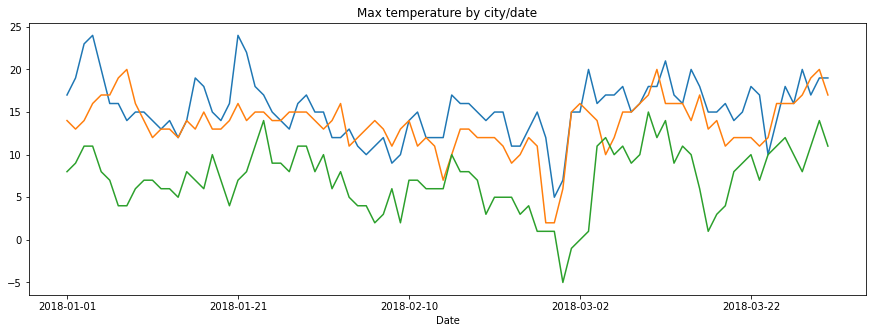

In [24]:
#dodaj tytuł wykresu ; legend - false - by nie było legendy
temp_max.plot(figsize=(15,5) , title="Max temperature by city/date" , legend=False)

<AxesSubplot:xlabel='Date'>

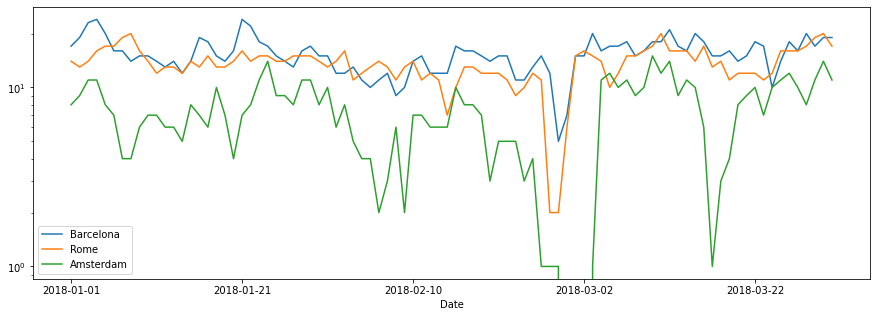

In [25]:
#loarytmiczna skala
temp_max.plot(figsize=(15,5) , logy=True)

<AxesSubplot:xlabel='Date'>

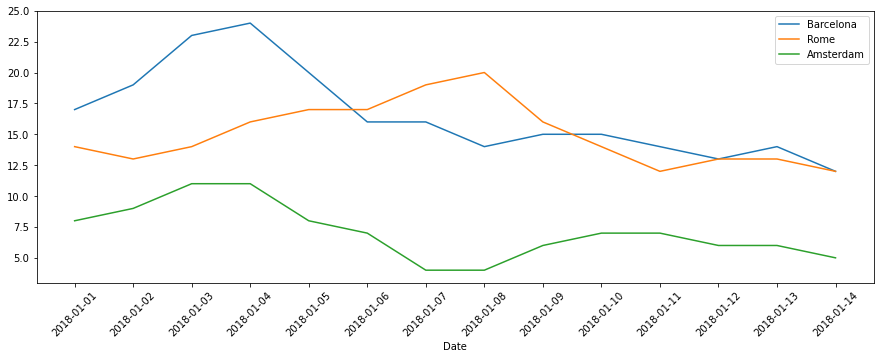

In [28]:
# rot=45 ustawienie pod kątem 45stopni ; xticks=(range(14) - ma być 14 dat
temp_max[:14].plot(figsize=(15,5) , xticks=(range(14)), rot=45)

<AxesSubplot:xlabel='Date'>

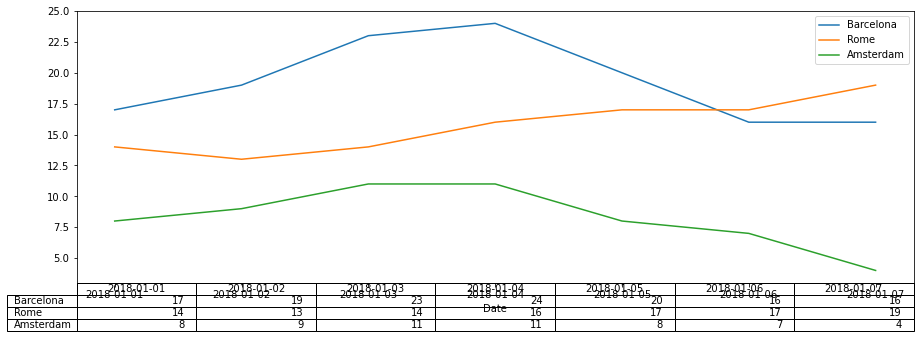

In [29]:
# table -tablica
temp_max[:7].plot(figsize=(15,5) , table=True)

<AxesSubplot:xlabel='Date'>

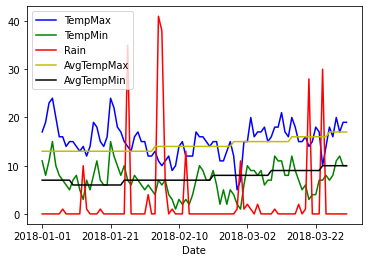

In [31]:
#w module strony internetowej matplotlib - biblioteka
#kolorki
bar.plot(color=['b','g','r','y','k'])

<AxesSubplot:xlabel='Date'>

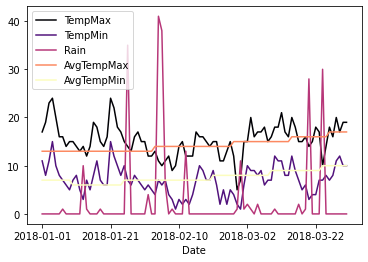

In [35]:
#w module strony internetowej matplotlib - biblioteka
#kolorki z mapy predefiniowana seria stronka
bar.plot(colormap='magma')

In [33]:
#jakie style kolorów są dostępne
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:xlabel='Date'>

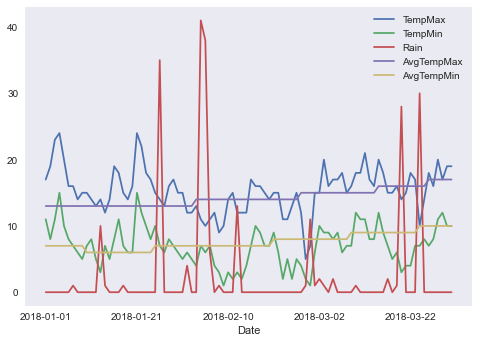

In [38]:
#by był styl i grak siatki
plt.style.use('seaborn-deep')
bar.plot(grid=False)

In [39]:
#wykres kołowy

In [41]:
#robimy zapytanie czy temperatura była wyższa czy niższa niż średnia temperatura dla miasta
def GradeDay(row):
    if(row['TempMax'] >= row['AvgTempMax']):
        return 'PLUS'
    else:
        return 'MINUS'

In [42]:
rom['GradeDay'] = rom.apply(GradeDay, axis=1)
bar['GradeDay'] = bar.apply(GradeDay, axis=1)
ams['GradeDay'] = ams.apply(GradeDay, axis=1)

In [43]:
rom.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,GradeDay
Date,,,,,,
2018-01-01,14,8,0,12,4,PLUS
2018-01-02,13,7,0,12,4,PLUS
2018-01-03,14,1,0,12,4,PLUS
2018-01-04,16,6,0,12,4,PLUS
2018-01-05,17,7,0,12,3,PLUS


In [44]:
rom['GradeDay'].value_counts()

PLUS     70
MINUS    20
Name: GradeDay, dtype: int64

In [45]:
cities3 = pd.DataFrame(index=['MINUS','PLUS'])

In [46]:
#zlicz ile na plus a ile na minus wartości podanych w indeksie
cities3['Barcelona'] = bar['GradeDay'].value_counts()
cities3['Rome'] = rom['GradeDay'].value_counts()
cities3['Amsterdam'] = ams['GradeDay'].value_counts()
cities3

,Barcelona,Rome,Amsterdam
MINUS,26,20,22
PLUS,64,70,68


<AxesSubplot:ylabel='Barcelona'>

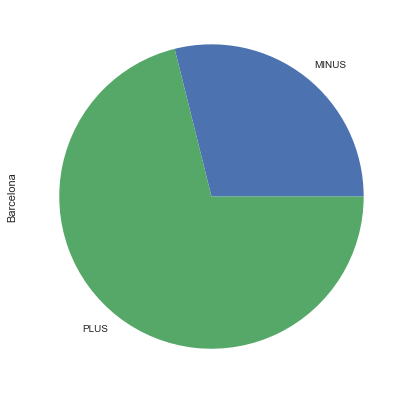

In [48]:
cities3['Barcelona'].plot(kind="pie", figsize=(7,7))

array([[<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>],
       [<AxesSubplot:ylabel='Amsterdam'>, <AxesSubplot:>]], dtype=object)

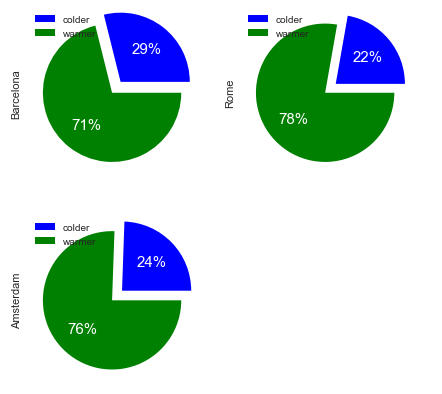

In [62]:
#aby pokazać 3 wykresy ; kolorki blue green ; labels - co ma być napisane na legendzie
cities3.plot(kind="pie", figsize=(7,7), subplots=True, labels=['colder','warmer'], colors=['b','g'], 
            autopct='%.0f%%', fontsize=15, textprops=dict(color='w'), explode = (0.2,0), layout=(2,2))
# %.0f%% - że nie ma miejsc po przecinku dla pokazanych wartości procentowych
#zmiana stylu liter textprops w-white ; layout - określenie układu wykresów np. 2 rzędy 2 wiersze
#explode - by wysunąć fragment wykresu np. 0.2

In [63]:
#wykres słupkowy

<AxesSubplot:>

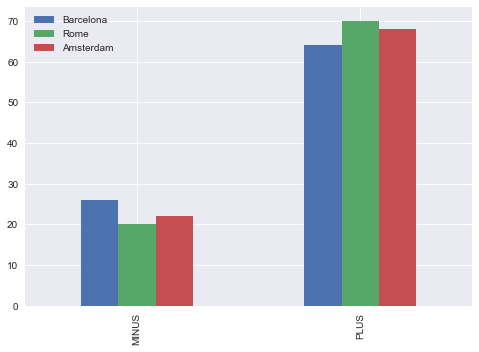

In [64]:
cities3.plot(kind="bar")

<AxesSubplot:>

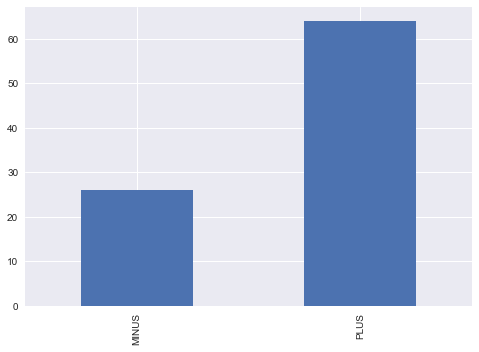

In [65]:
cities3['Barcelona'].plot(kind="bar")

<AxesSubplot:>

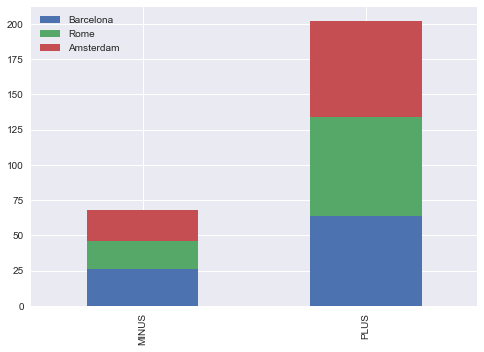

In [67]:
cities3.plot(kind="bar", stacked=True)

<AxesSubplot:>

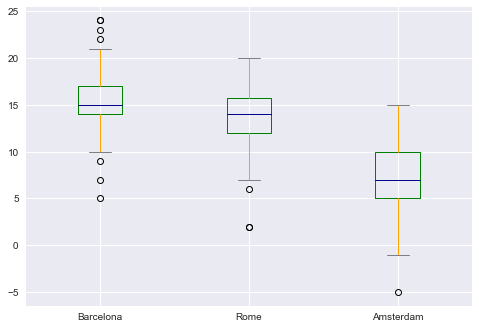

In [70]:
#wykres skrzynkowy ; dla wartości statystycznych
color = dict(boxes="Green", whiskers="Orange", medians="Darkblue", caps="Gray")
temp_max.plot(kind='box', color=color)

In [71]:
#niskie pudełko - dane zwarte, stabline, podobne ; rozciągnięte pudełko - dane mało stabilne

In [75]:
#histogram 1.ile powinno być przedziałów , tu jest 18
bar["TempMax"].nunique()

18

<AxesSubplot:ylabel='Frequency'>

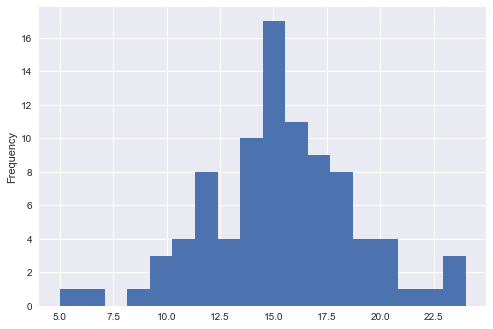

In [76]:
bar["TempMax"].plot(kind='hist', bins=18)

In [84]:
#wykresy innego typu
autos = pd.read_csv("dane/Mcdonalds.csv")

In [85]:
autos.head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [91]:
import re
#wyrażenie regularne gdzie ma być zawarte hasło Sausage
regex = re.compile('.*Sausage.*', re.IGNORECASE)
filter1 = autos['Item'].apply(lambda x: bool(regex.search(x)))
filter2 = autos['Calories']>0
food = autos[filter1 & filter2]

#wyrażenie regularne2 
regex = re.compile('.*Egg.*', re.IGNORECASE)
filter1 = autos['Item'].apply(lambda x: bool(regex.search(x)))
filter2 = autos['Calories']>0
egg = autos[filter1 & filter2]

In [87]:
food.head()

,Category,Item,Serving Size,Calories,Calories from Fat,TotalFat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
10,Breakfast,Sausage Biscuit (Regular Biscuit),4.1 oz (117 g),430,240,27.0,42,12.0,62,0.0,...,34,11,2,6,2,11,0,0,6,15
11,Breakfast,Sausage Biscuit (Large Biscuit),4.6 oz (131 g),480,280,31.0,48,13.0,65,0.0,...,39,13,3,11,3,11,4,0,8,15


<AxesSubplot:xlabel='Calories', ylabel='TotalFat'>

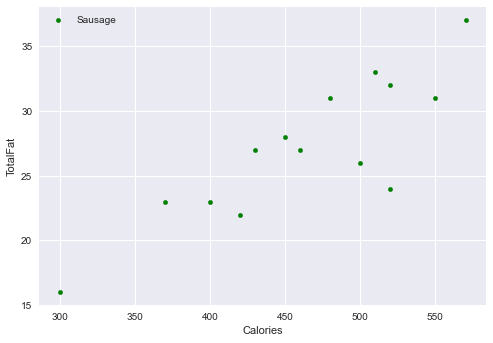

In [93]:
food.plot(kind='scatter', x='Calories',y='TotalFat', color='Green', label="Sausage")

<AxesSubplot:xlabel='Calories', ylabel='TotalFat'>

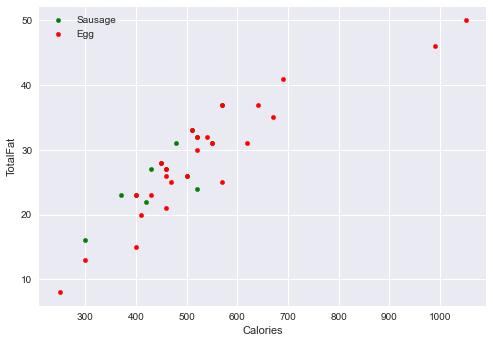

In [96]:
#dwa wykresy w jednym polu
ax = food.plot(kind='scatter', x='Calories',y='TotalFat', color='Green', label="Sausage")
egg.plot.scatter( x='Calories',y='TotalFat', color='Red', label="Egg", ax=ax)

<AxesSubplot:title={'center':'Egg'}, xlabel='Calories', ylabel='TotalFat'>

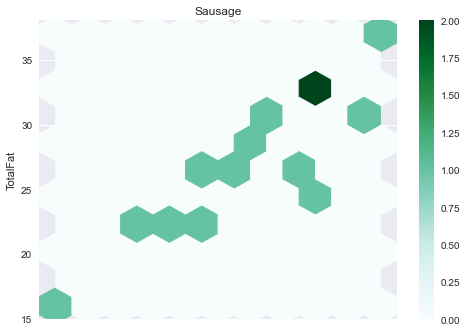

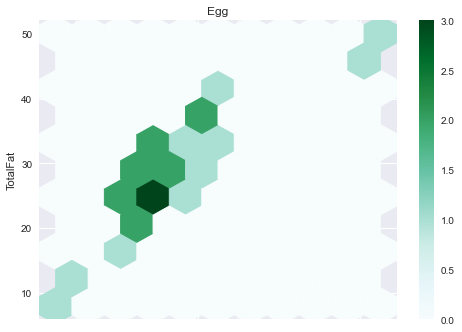

In [101]:
#wykresy hexagonalne - rozmywające wartości i większa moc dla większej ilości kropek
food.plot.hexbin( x='Calories',y='TotalFat', gridsize=10,  title="Sausage")
egg.plot.hexbin( x='Calories',y='TotalFat', gridsize=10, title="Egg")

<AxesSubplot:>

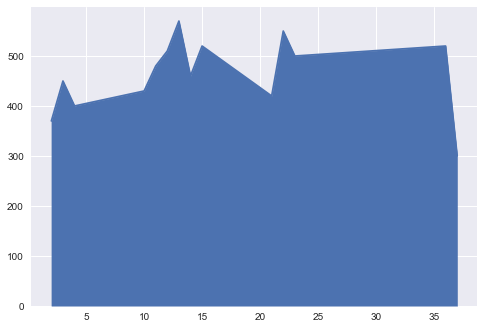

In [103]:
food['Calories'].plot(kind="area")